In [1]:
from plots import two_plots, two_plot, four_plots, three_plots
import sklearn.metrics as sklm
import pseudomodes as pds
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('data/traindata.csv')

In [3]:
lithos = pds.PredictLitho(df, None)

Number of cross validation folds should be greater than 2; 2 specified
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 100 rounds
[200]	valid_0's l2: 9.02271e-05
[400]	valid_0's l2: 9.43978e-06
[600]	valid_0's l2: 6.22595e-06
[800]	valid_0's l2: 5.31412e-06
[1000]	valid_0's l2: 4.98137e-06
[1200]	valid_0's l2: 4.69613e-06
[1400]	valid_0's l2: 4.45737e-06
[1600]	valid_0's l2: 4.27743e-06
[1800]	valid_0's l2: 4.13631e-06
[2000]	valid_0's l2: 4.04151e-06
[2200]	valid_0's l2: 3.95393e-06
[2400]	valid_0's l2: 3.8872e-06
[2600]	valid_0's l2: 3.81539e-06
[2800]	valid_0's l2: 3.74765e-06
[3000]	valid_0's l2: 3.69964e-06
Did not meet early stopping. Best iteration is:
[3000]	valid_0's l2: 3.69964e-06
The test RMSE is : 0.0019234457545318601
The test R2 score is : 0.9999999999998485
None


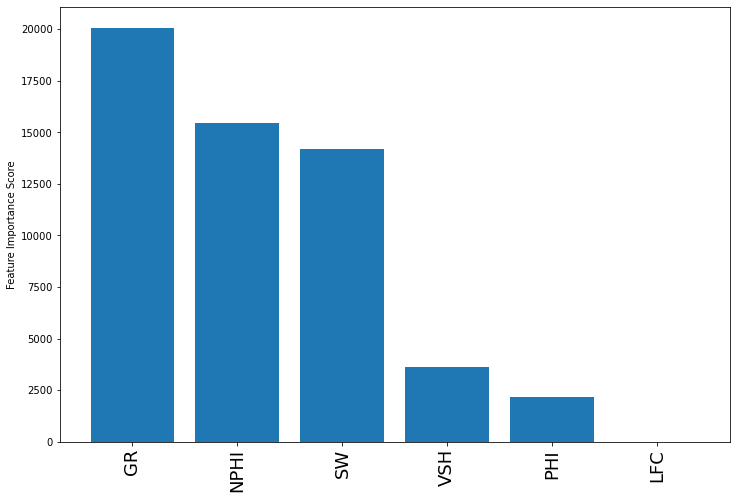

<Figure size 864x576 with 0 Axes>

In [4]:
predictions = lithos.predict('RHOB', 400, 1000, model='LGB')

In [5]:
# generating a synthetic depth column for the well

df['depth'] = range(0, df.shape[0])

# slicing off the dataframe based on the depth specified for prediction for evaluation

df = df.iloc[df[df.depth == 400].index[0]:df[df.depth == 1000].index[0]]

In [6]:
print(f'R2 score is: {round((sklm.r2_score(df.RHOB, predictions)), 2)}')
print(f'RMSE is: {round((sklm.mean_squared_error(df.RHOB, predictions) ** 0.5), 4)}')

R2 score is: 0.94
RMSE is: 0.0132
